#**Plant Disease Classification using Advanced Machine Learning Techniques**

In [ ]:
!pip install --upgrade scikit-image
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import metrics
from tensorflow.keras.metrics import Precision, Recall

# Needed for SVM
import cv2
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from skimage.feature import hog
import joblib
from sklearn.model_selection import train_test_split



In [ ]:
!pip install opencv-python

In [ ]:
train_images_dir = '/Users/Documents/New Plant Diseases Dataset(Augmented)/train'
test_images_dir = '/Users/Documents/New Plant Diseases Dataset(Augmented)/valid'

##Random Forest Model


In [ ]:
from PIL import Image
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier

images = []
image_labels = []

train = '/Users/varunshrivathsa/Documents/New Plant Diseases Dataset(Augmented)/train'

for category in os.listdir(train):
    category_path = os.path.join(train, category)
    if os.path.isdir(category_path):
        for img_file in os.listdir(category_path):
            img_path = os.path.join(category_path, img_file)
            try:
                img = Image.open(img_path).resize((64, 64))
                img_flat = np.array(img).flatten()
                images.append(img_flat)
                image_labels.append(category)
            except Exception as error:
                print(f"Error loading image {img_path}: {error}")

images = np.array(images)
image_labels = np.array(image_labels)

print(f"Loaded {images.shape[0]} images with {len(np.unique(image_labels))} categories.")

num_samples = len(images)
num_bootstrap_samples = 100
images_bootstrap, labels_bootstrap = resample(
    images, image_labels, n_samples=num_samples, replace=True, random_state=42
)

print(f"Bootstrap sample size: {images_bootstrap.shape}")
print(f"Categories in bootstrap sample: {np.unique(labels_bootstrap)}")

model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
model.fit(images, image_labels)

print(f"OOB Score: {model.oob_score_ * 100:.2f}%")

validate = '/Users/varunshrivathsa/Documents/New Plant Diseases Dataset(Augmented)/valid'

valid_img = []
valid_label = []

for category in os.listdir(validate):
    category_path = os.path.join(validate, category)
    if os.path.isdir(category_path):
        for img_file in os.listdir(category_path):
            img_path = os.path.join(category_path, img_file)
            try:
                img = Image.open(img_path).resize((64, 64))
                img_flat = np.array(img).flatten()
                valid_img.append(img_flat)
                valid_label.append(category)
            except Exception as error:
                print(f"Error loading image {img_path}: {error}")

valid_img = np.array(valid_img)
valid_label = np.array(valid_label)

validation_accuracy = model.score(valid_img, valid_label)
print(f"Validation Accuracy: {validation_accuracy * 100:.2f}%")


Loaded 70295 images with 38 categories.
Bootstrap sample size: (70295, 12288)
Categories in bootstrap sample: ['Apple___Apple_scab' 'Apple___Black_rot' 'Apple___Cedar_apple_rust'
 'Apple___healthy' 'Blueberry___healthy'
 'Cherry_(including_sour)___Powdery_mildew'
 'Cherry_(including_sour)___healthy'
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
 'Corn_(maize)___Common_rust_' 'Corn_(maize)___Northern_Leaf_Blight'
 'Corn_(maize)___healthy' 'Grape___Black_rot'
 'Grape___Esca_(Black_Measles)'
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)' 'Grape___healthy'
 'Orange___Haunglongbing_(Citrus_greening)' 'Peach___Bacterial_spot'
 'Peach___healthy' 'Pepper,_bell___Bacterial_spot'
 'Pepper,_bell___healthy' 'Potato___Early_blight' 'Potato___Late_blight'
 'Potato___healthy' 'Raspberry___healthy' 'Soybean___healthy'
 'Squash___Powdery_mildew' 'Strawberry___Leaf_scorch'
 'Strawberry___healthy' 'Tomato___Bacterial_spot' 'Tomato___Early_blight'
 'Tomato___Late_blight' 'Tomato___Leaf_Mold' 'Tomat

##Custom CNN Model

In [ ]:
train_dataset_generator=ImageDataGenerator(rescale=1./255,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.20)

tesr_dataset_generator=ImageDataGenerator(rescale=1./255)


In [ ]:
train_images=train_dataset_generator.flow_from_directory(
                                        train_images_dir,
                                        batch_size=128,
                                        target_size=(150,150),
                                        class_mode='categorical',
                                        subset='training',
                                        color_mode='rgb'
                                        )

Found 56251 images belonging to 38 classes.


In [ ]:
validation_images=train_dataset_generator.flow_from_directory(
                                        train_images_dir,
                                        batch_size=128,
                                        target_size=(150,150),
                                        class_mode='categorical',
                                        subset='validation',
                                        color_mode='rgb'

                                        )

Found 14044 images belonging to 38 classes.


In [ ]:
test_images=tesr_dataset_generator.flow_from_directory(
                                        test_images_dir,
                                        batch_size=128,
                                        target_size=(150,150),
                                        class_mode='categorical',
                                        color_mode='rgb'
                                        )

Found 17572 images belonging to 38 classes.


In [ ]:
class_label_dict=train_images.class_indices
class_label_list=list(class_label_dict.keys())


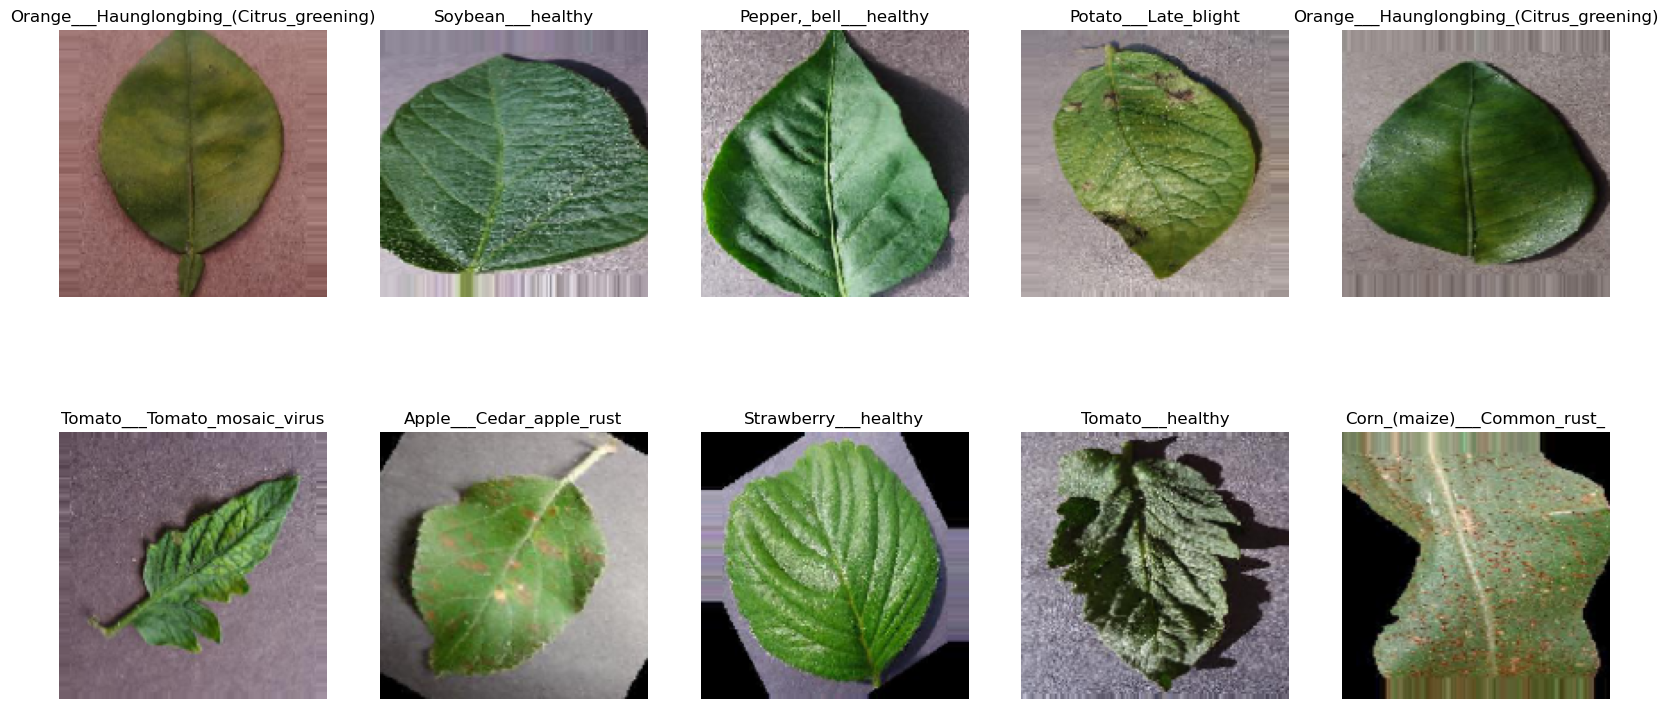

In [ ]:
n = 10
plt.figure(figsize=(20,20))
for image, label in train_images:
    for i in range(n):
        plt.subplot(4, 5, i + 1)
        plt.imshow(image[i])
        plt.title(class_label_list[np.where(label[i] == 1)[0][0]])
        plt.axis('off')
    plt.show()
    break

In [ ]:

PLant_Disease_model = Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu',),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.GlobalAveragePooling2D(),
    layers.Dense(512),
    BatchNormalization(),
    layers.Activation('relu'),

    layers.Dropout(0.5),
    layers.Dense(38, activation='softmax')
])


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
PLant_Disease_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 5, 5, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        19,494 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,852,774 (7.07 MB)

 Trainable params: 1,851,750 (7.06 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

Rop = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    verbose=1
)

In [ ]:

early_criteria = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)


In [ ]:

PLant_Disease_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall()])


In [ ]:
model_history=PLant_Disease_model.fit(
    train_images,
    steps_per_epoch = train_images.samples // train_images.batch_size,
    validation_data=validation_images,
    validation_steps=validation_images.samples//validation_images.batch_size,
    epochs=20,
    callbacks=[early_criteria,Rop],
    verbose=1

)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 291s 660ms/step - accuracy: 0.4081 - loss: 2.0526 - precision: 0.6835 - recall: 0.2427 - val_accuracy: 0.6993 - val_loss: 0.9758 - val_precision: 0.8268 - val_recall: 0.5571 - learning_rate: 0.0010
Epoch 2/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 305us/step - accuracy: 0.7344 - loss: 0.7706 - precision: 0.8269 - recall: 0.6719 - val_accuracy: 0.5870 - val_loss: 1.2188 - val_precision: 0.6842 - val_recall: 0.4239 - learning_rate: 0.0010
Epoch 3/20


2024-12-11 23:56:01.832612: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
2024-12-11 23:56:01.949956: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


439/439 ━━━━━━━━━━━━━━━━━━━━ 291s 663ms/step - accuracy: 0.8090 - loss: 0.6071 - precision: 0.8728 - recall: 0.7439 - val_accuracy: 0.8328 - val_loss: 0.5055 - val_precision: 0.8768 - val_recall: 0.7995 - learning_rate: 0.0010
Epoch 4/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 291us/step - accuracy: 0.8750 - loss: 0.3781 - precision: 0.9024 - recall: 0.8672 - val_accuracy: 0.9022 - val_loss: 0.3167 - val_precision: 0.9302 - val_recall: 0.8696 - learning_rate: 0.0010
Epoch 5/20


2024-12-12 00:00:53.882393: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


439/439 ━━━━━━━━━━━━━━━━━━━━ 1209s 3s/step - accuracy: 0.8793 - loss: 0.3789 - precision: 0.9117 - recall: 0.8493 - val_accuracy: 0.8912 - val_loss: 0.3263 - val_precision: 0.9184 - val_recall: 0.8692 - learning_rate: 0.0010
Epoch 6/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 291us/step - accuracy: 0.9297 - loss: 0.2374 - precision: 0.9590 - recall: 0.9141 - val_accuracy: 0.8587 - val_loss: 0.3999 - val_precision: 0.8837 - val_recall: 0.8261 - learning_rate: 0.0010
Epoch 7/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 286s 651ms/step - accuracy: 0.9120 - loss: 0.2709 - precision: 0.9335 - recall: 0.8932 - val_accuracy: 0.8207 - val_loss: 0.6129 - val_precision: 0.8475 - val_recall: 0.8015 - learning_rate: 0.0010
Epoch 8/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 289us/step - accuracy: 0.8906 - loss: 0.3040 - precision: 0.9333 - recall: 0.8750 - val_accuracy: 0.8152 - val_loss: 0.5645 - val_precision: 0.8315 - val_recall: 0.8043 - learning_rate: 0.0010
Epoch 9/20


2024-12-12 00:25:50.790987: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


439/439 ━━━━━━━━━━━━━━━━━━━━ 296s 673ms/step - accuracy: 0.9296 - loss: 0.2165 - precision: 0.9455 - recall: 0.9150 - val_accuracy: 0.9128 - val_loss: 0.2662 - val_precision: 0.9285 - val_recall: 0.9007 - learning_rate: 0.0010
Epoch 10/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 277us/step - accuracy: 0.8984 - loss: 0.2705 - precision: 0.9256 - recall: 0.8750 - val_accuracy: 0.9457 - val_loss: 0.2081 - val_precision: 0.9663 - val_recall: 0.9348 - learning_rate: 0.0010
Epoch 11/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 2041s 5s/step - accuracy: 0.9389 - loss: 0.1869 - precision: 0.9510 - recall: 0.9270 - val_accuracy: 0.9212 - val_loss: 0.2430 - val_precision: 0.9334 - val_recall: 0.9107 - learning_rate: 0.0010
Epoch 12/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 284us/step - accuracy: 0.9688 - loss: 0.0925 - precision: 0.9840 - recall: 0.9609 - val_accuracy: 0.9674 - val_loss: 0.1919 - val_precision: 0.9778 - val_recall: 0.9565 - learning_rate: 0.0010
Epoch 13/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 288s 655ms/step - acc

2024-12-12 01:14:27.812727: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


439/439 ━━━━━━━━━━━━━━━━━━━━ 290s 659ms/step - accuracy: 0.9579 - loss: 0.1285 - precision: 0.9642 - recall: 0.9525 - val_accuracy: 0.9455 - val_loss: 0.1594 - val_precision: 0.9533 - val_recall: 0.9407 - learning_rate: 0.0010
Epoch 18/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 314us/step - accuracy: 0.9453 - loss: 0.1828 - precision: 0.9528 - recall: 0.9453 - val_accuracy: 0.9674 - val_loss: 0.1103 - val_precision: 0.9670 - val_recall: 0.9565 - learning_rate: 0.0010
Epoch 19/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 291s 663ms/step - accuracy: 0.9612 - loss: 0.1161 - precision: 0.9669 - recall: 0.9562 - val_accuracy: 0.9025 - val_loss: 0.3220 - val_precision: 0.9153 - val_recall: 0.8933 - learning_rate: 0.0010
Epoch 20/20
439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 288us/step - accuracy: 0.9375 - loss: 0.1480 - precision: 0.9370 - recall: 0.9297 - val_accuracy: 0.9130 - val_loss: 0.2546 - val_precision: 0.9130 - val_recall: 0.9130 - learning_rate: 0.0010


In [ ]:
model_train_accuracy = max(model_history.history['accuracy'])
model_val_accuracy = max(model_history.history['val_accuracy'])

print("CNN Model Training Accuracy:", model_train_accuracy)
print("CNN Model Validation Accuracy:", model_val_accuracy)


CNN Model Training Accuracy: 0.9765625
CNN Model Validation Accuracy: 0.967391312122345


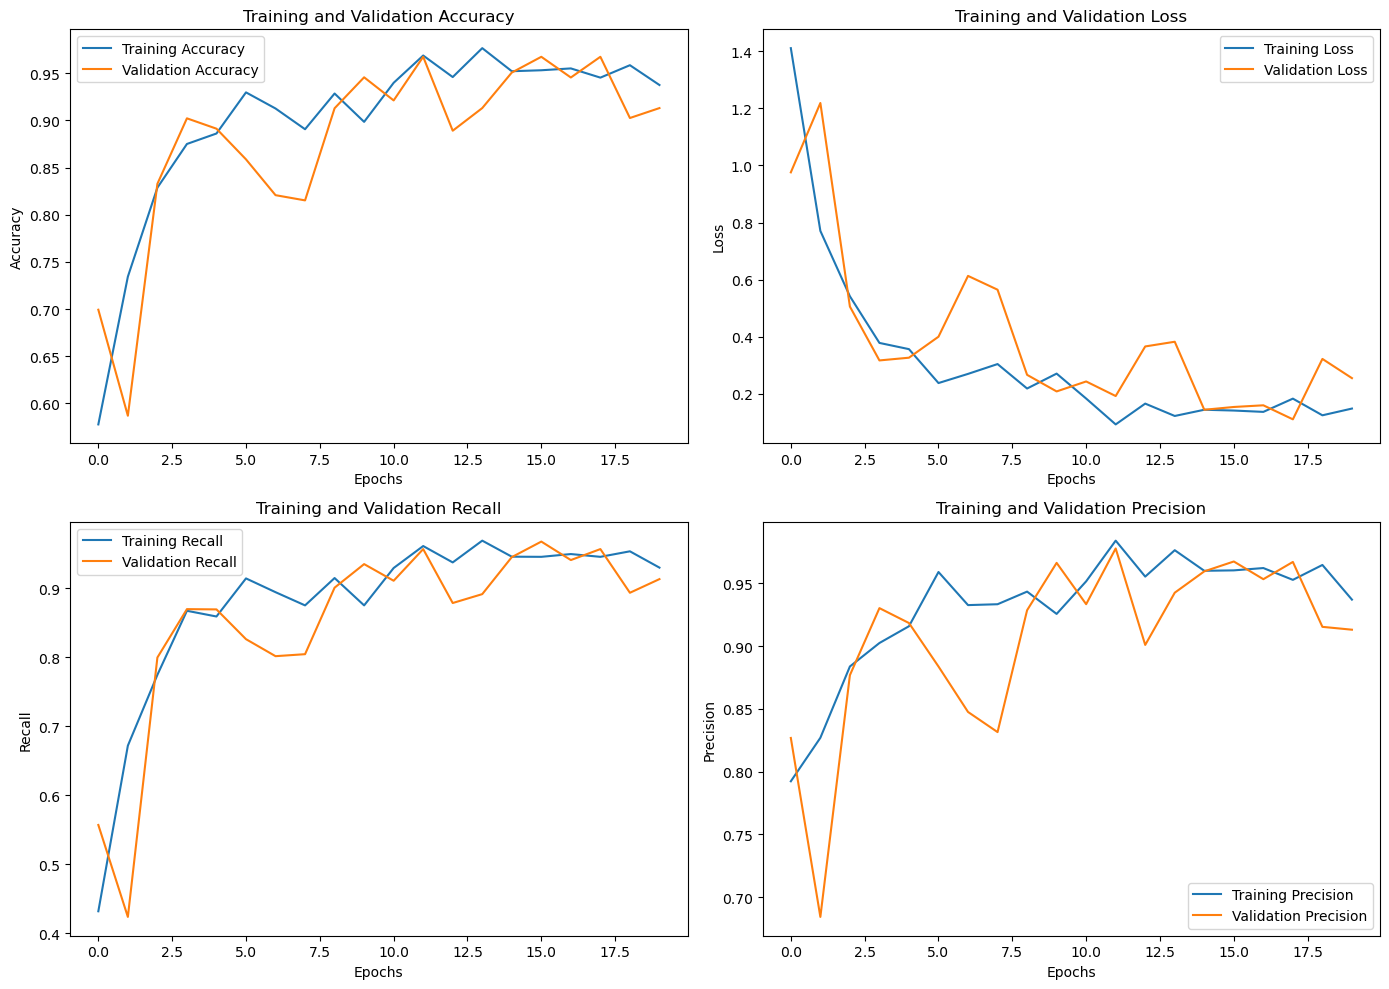

In [ ]:

metrics = {
    "Accuracy": ("accuracy", "val_accuracy"),
    "Loss": ("loss", "val_loss"),
    "Recall": ("recall", "val_recall"),
    "Precision": ("precision", "val_precision"),
}

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.ravel()

for i, (model_metric_name, (model_train_metric, model_val_metric)) in enumerate(metrics.items()):
    axs[i].plot(model_history.history.get(model_train_metric), label=f'Training {model_metric_name}')
    axs[i].plot(model_history.history.get(model_val_metric), label=f'Validation {model_metric_name}')
    axs[i].set_xlabel('Epochs')
    axs[i].set_ylabel(model_metric_name)
    axs[i].set_title(f'Training and Validation {model_metric_name}')
    axs[i].legend()

plt.tight_layout()
plt.show()


In [ ]:
model_results = PLant_Disease_model.evaluate(test_images)
loss = model_results[0]
accuracy = model_results[1]
precision = model_results[2]
recall = model_results[3]

print("Testing Loss:", loss)
print("Testing Accuracy:", accuracy)
print("Testing Precision:", precision)
print("Testing Recall:", recall)


138/138 ━━━━━━━━━━━━━━━━━━━━ 22s 159ms/step - accuracy: 0.9424 - loss: 0.1803 - precision: 0.9510 - recall: 0.9365
Testing Loss: 0.17775681614875793
Testing Accuracy: 0.9412702322006226
Testing Precision: 0.9496623277664185
Testing Recall: 0.9362053275108337


# ResNet

In [ ]:
!pip install torch torchvision torchaudio

In [ ]:
!pip install torchcam

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
from torch.amp import autocast, GradScaler
from sklearn.metrics import classification_report, confusion_matrix
from torchcam.methods import SmoothGradCAMpp
from torchcam.utils import overlay_mask
from torchvision.transforms.functional import to_pil_image
import random

In [ ]:
# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Data transforms
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(128),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(128),
        transforms.CenterCrop(128),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Load the full training dataset
full_train_dataset = datasets.ImageFolder(train_images_dir, transform=data_transforms['train'])

# Split into training and validation datasets (80-20 split)
train_size = int(0.8 * len(full_train_dataset))
val_size = len(full_train_dataset) - train_size
train_dataset, val_dataset = random_split(full_train_dataset, [train_size, val_size])

print(f"Training samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")

# Load the test dataset
test_dataset = datasets.ImageFolder(test_images_dir, transform=data_transforms['valid'])

# DataLoaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4, pin_memory=True)

# Dataset info
class_names = full_train_dataset.classes
num_classes = len(class_names)
print(f"Number of classes: {num_classes}")
print(f"Classes: {class_names}")

Using device: cpu
Training samples: 56236
Validation samples: 14059
Number of classes: 38
Classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 

In [ ]:
from torchvision.models import resnet18, ResNet18_Weights

model = resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scaler = GradScaler()

/opt/anaconda3/lib/python3.12/site-packages/torch/amp/grad_scaler.py:132: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


In [ ]:
# Training function
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    best_model_wts = model.state_dict()
    best_acc = 0.0

    history = {"train_loss": [], "val_loss": [], "train_acc": [], "val_acc": []}

    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}/{num_epochs}")
        print('-' * 20)

        # Training phase
        model.train()
        train_loss, train_corrects = 0.0, 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            with autocast(device_type='cuda'):
                outputs = model(inputs)
                loss = criterion(outputs, labels)

            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()

            train_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            train_corrects += torch.sum(preds == labels)

        train_loss /= len(train_loader.dataset)
        train_acc = train_corrects.double() / len(train_loader.dataset)

        # Validation phase
        model.eval()
        val_loss, val_corrects = 0.0, 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                with autocast(device_type='cuda'):
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_corrects += torch.sum(preds == labels)

        val_loss /= len(val_loader.dataset)
        val_acc = val_corrects.double() / len(val_loader.dataset)

        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
        print(f"Valid Loss: {val_loss:.4f}, Valid Acc: {val_acc:.4f}")

        # Save the best model
        if val_acc > best_acc:
            best_acc = val_acc
            best_model_wts = model.state_dict()

        # Update history
        history["train_loss"].append(train_loss)
        history["val_loss"].append(val_loss)
        history["train_acc"].append(train_acc.item())
        history["val_acc"].append(val_acc.item())

    print(f"Best Validation Accuracy: {best_acc:.4f}")
    model.load_state_dict(best_model_wts)
    return model, history

In [ ]:
# Function to plot training and validation metrics
def plot_training_history(history):
    # Plot loss
    plt.figure(figsize=(10, 5))
    plt.plot(history["train_loss"], label="Train Loss")
    plt.plot(history["val_loss"], label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss")
    plt.legend()
    plt.show()

    # Plot accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(history["train_acc"], label="Train Accuracy")
    plt.plot(history["val_acc"], label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training and Validation Accuracy")
    plt.legend()
    plt.show()

Epoch 1/10
--------------------


/opt/anaconda3/lib/python3.12/site-packages/torch/amp/autocast_mode.py:266: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


Train Loss: 0.5314, Train Acc: 0.8396
Valid Loss: 0.3508, Valid Acc: 0.8884
Epoch 2/10
--------------------
Train Loss: 0.2833, Train Acc: 0.9112
Valid Loss: 0.2987, Valid Acc: 0.9083
Epoch 3/10
--------------------
Train Loss: 0.2328, Train Acc: 0.9265
Valid Loss: 0.2159, Valid Acc: 0.9323
Epoch 4/10
--------------------
Train Loss: 0.1985, Train Acc: 0.9367
Valid Loss: 0.1748, Valid Acc: 0.9427
Epoch 5/10
--------------------
Train Loss: 0.1794, Train Acc: 0.9425
Valid Loss: 0.1628, Valid Acc: 0.9459
Epoch 6/10
--------------------
Train Loss: 0.1687, Train Acc: 0.9468
Valid Loss: 0.1564, Valid Acc: 0.9494
Epoch 7/10
--------------------
Train Loss: 0.1543, Train Acc: 0.9502
Valid Loss: 0.1415, Valid Acc: 0.9573
Epoch 8/10
--------------------
Train Loss: 0.1430, Train Acc: 0.9550
Valid Loss: 0.1369, Valid Acc: 0.9574
Epoch 9/10
--------------------
Train Loss: 0.1358, Train Acc: 0.9566
Valid Loss: 0.1308, Valid Acc: 0.9582
Epoch 10/10
--------------------
Train Loss: 0.1300, Train A

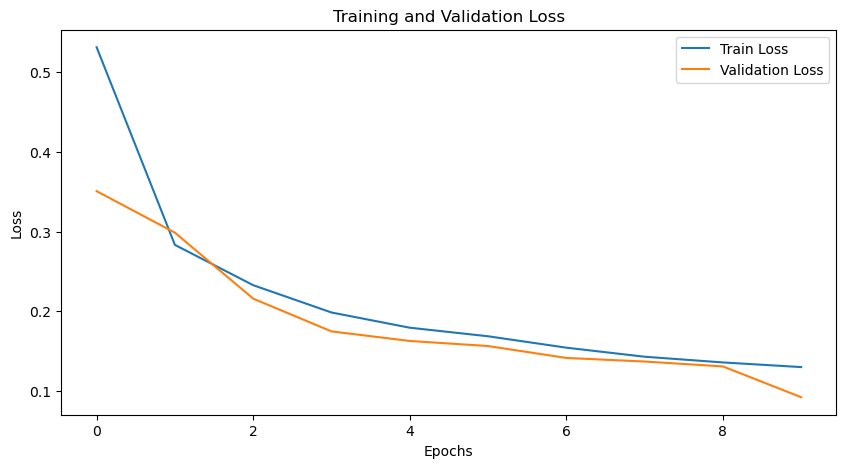

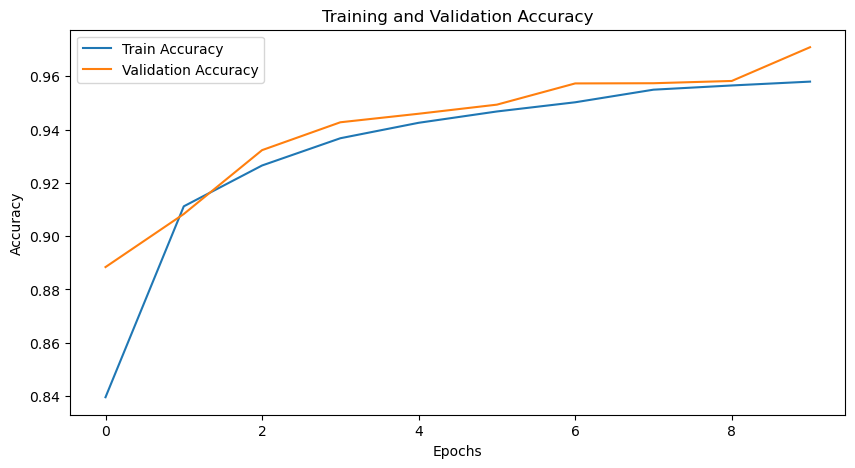

Model saved as plant_disease_resnet18.pth


/var/folders/mx/vz440tc13r30000gjn16f5qw0000gn/T/ipykernel_64310/1938415876.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("plant_disease_resne

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# Train the model and get history
model, history = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10)

# Plot training history
plot_training_history(history)

# Save the model
torch.save(model.state_dict(), "plant_disease_resnet18.pth")
print("Model saved as plant_disease_resnet18.pth")

# Load the best model weights
state_dict = torch.load("plant_disease_resnet18.pth", map_location=device)
model.load_state_dict(state_dict)
model.eval()

Test Accuracy: 0.9828

Classification Report:
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      0.96      0.98       504
                                 Apple___Black_rot       0.98      1.00      0.99       497
                          Apple___Cedar_apple_rust       0.97      1.00      0.98       440
                                   Apple___healthy       0.99      0.99      0.99       502
                               Blueberry___healthy       0.96      0.99      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.96      0.98       421
                 Cherry_(including_sour)___healthy       0.98      1.00      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.97      0.94       410
                       Corn_(maize)___Common_rust_       0.98      0.99      0.98       477
               Corn_(maize)___Nor

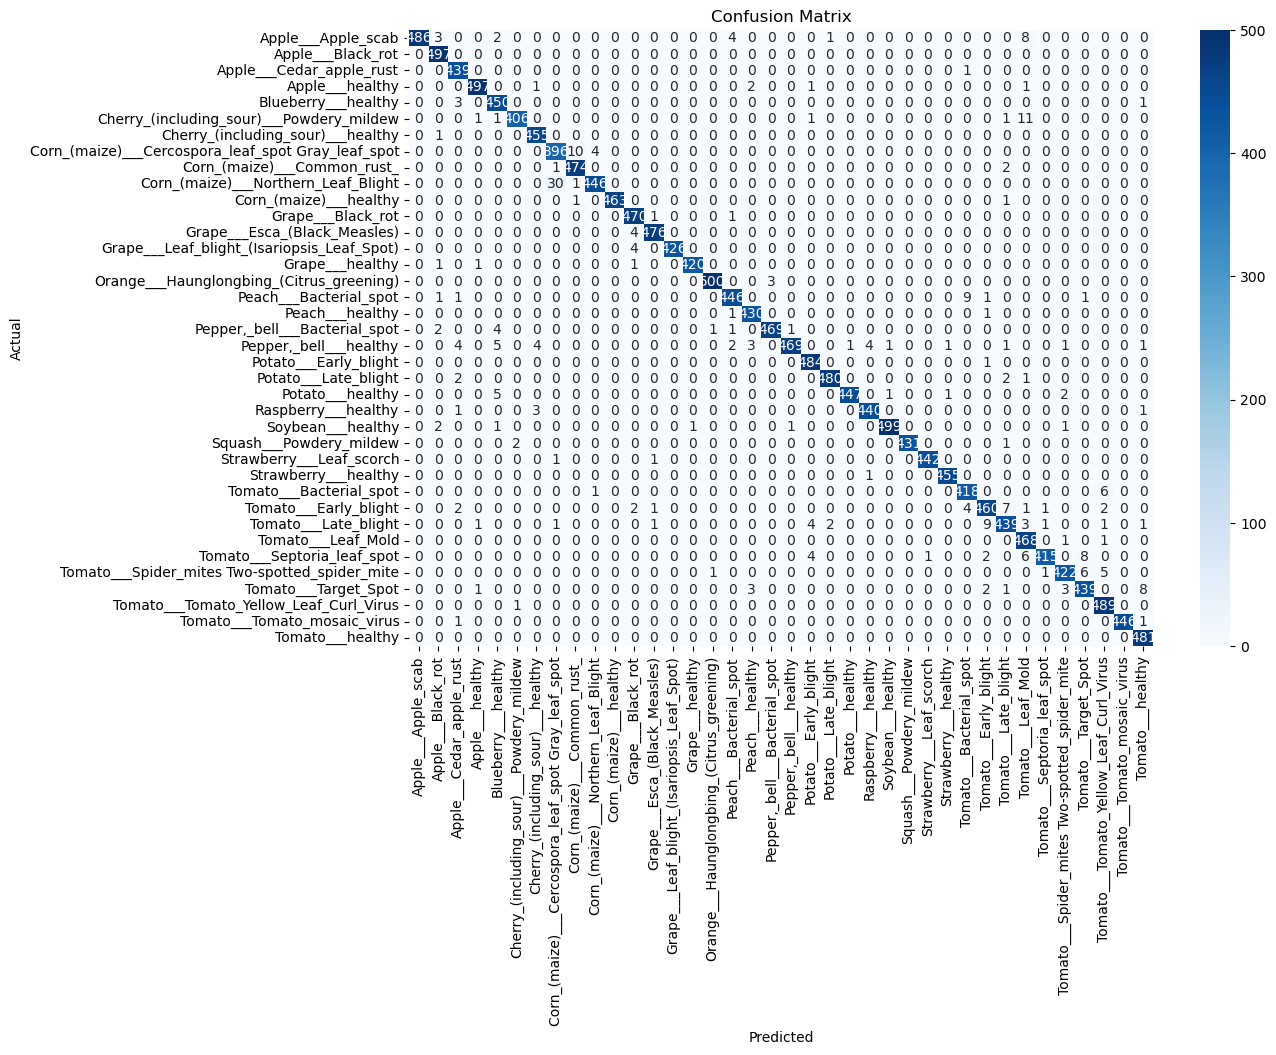

In [ ]:
# Evaluate the model on the test dataset
def evaluate_model_on_test(loader, model, class_names):
    model.eval()  # Set model to evaluation mode
    test_corrects = 0
    total_samples = 0

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            test_corrects += torch.sum(preds == labels).item()
            total_samples += labels.size(0)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calculate overall test accuracy
    test_accuracy = test_corrects / total_samples
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # Generate classification report
    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))

    # Confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

    # Plot confusion matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.title("Confusion Matrix")
    plt.show()

# Evaluate on test data
evaluate_model_on_test(test_loader, model, class_names)

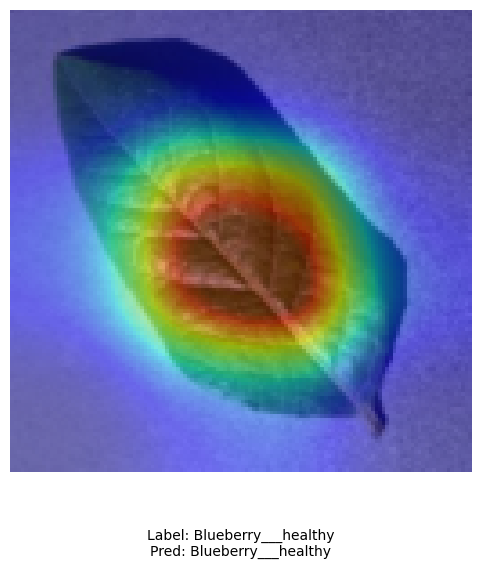

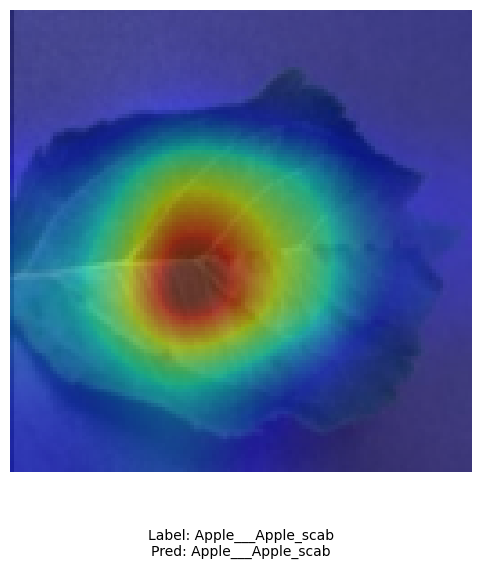

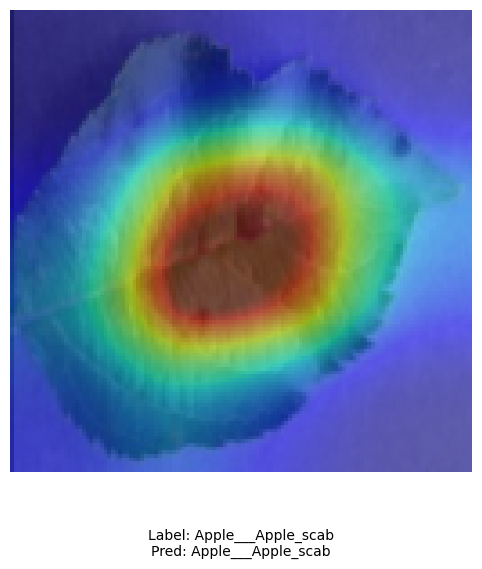

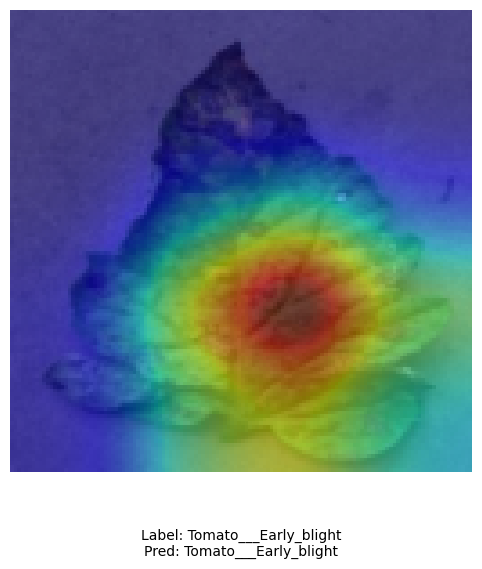

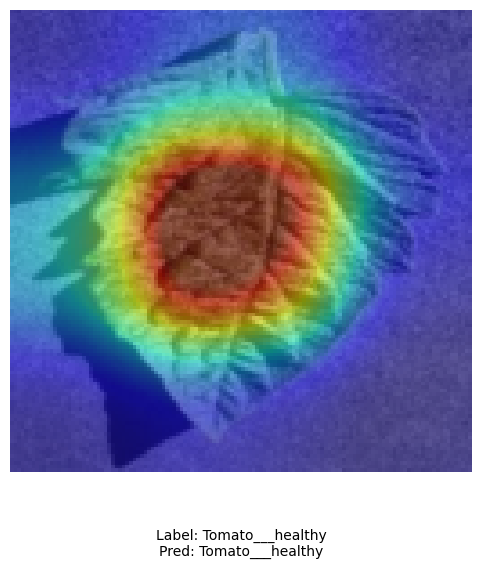

In [ ]:
# Grad-CAM visualization
cam_extractor = SmoothGradCAMpp(model)

# Function to visualize Grad-CAM heatmap
def visualize_cam(image, label, cam_extractor, class_names, mean, std):
    # Denormalize the image
    def denormalize(image, mean, std):
        mean = np.array(mean)
        std = np.array(std)
        image = image.permute(1, 2, 0).cpu().numpy()
        image = std * image + mean
        image = np.clip(image, 0, 1)
        return image

    denorm_image = denormalize(image, mean, std)

    with torch.set_grad_enabled(True):
        model.eval()
        output = model(image.unsqueeze(0).to(device))  # Add batch dimension and move to device
        _, pred_class = torch.max(output, 1)

    # Extract the CAM
    cam = cam_extractor(pred_class.item(), output)
    cam_img = overlay_mask(
        to_pil_image(denorm_image),
        to_pil_image(cam[0].squeeze(0), mode='F'),
        alpha=0.5,
    )

    # Plot the CAM
    plt.figure(figsize=(8, 6))
    plt.imshow(cam_img)
    plt.title(f"Label: {class_names[label]}\nPred: {class_names[pred_class.item()]}", fontsize=10, y=-0.2)
    plt.axis("off")
    plt.show()


# Visualize Grad-CAM for 5 random test images
def visualize_random_test_images(test_dataset, cam_extractor, class_names, mean, std, num_images=5):
    indices = random.sample(range(len(test_dataset)), num_images)

    for idx in indices:
        image, label = test_dataset[idx]  # Get the image and its true label
        visualize_cam(image, label, cam_extractor, class_names, mean, std)

# Denormalization for Grad-CAM visualization
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

visualize_random_test_images(test_dataset, cam_extractor, class_names, mean, std, num_images=5)






##SVM

In [ ]:
def extract_hog_features_and_labels(dataset_path, label_encoder=None, img_size=(128, 128), batch_size=100):
    images = []
    labels = []

    for folder in os.listdir(dataset_path):
        label = folder
        folder_path = os.path.join(dataset_path, folder)

        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)

            if img is not None:
                img = cv2.resize(img, img_size)
                if len(img.shape) == 3:
                    try:
                        features = hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), multichannel=True)
                    except TypeError:
                        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
                        features = hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2))
                else:
                    features = hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2))
                images.append(features)
                labels.append(label)

            if len(images) >= batch_size:
                yield np.array(images), np.array(labels)
                images, labels = [], []

    if len(images) > 0:
        yield np.array(images), np.array(labels)

In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Train HOG feature extraction with batch processing
train_features, train_labels = [], []
for features_batch, labels_batch in extract_hog_features_and_labels(train_images_dir, label_encoder):
    train_features.extend(features_batch)
    train_labels.extend(labels_batch)

train_features = np.array(train_features)
train_labels = label_encoder.fit_transform(train_labels)

In [ ]:
# Test HOG feature extraction with batch processing
test_features, test_labels = [], []
for features_batch, labels_batch in extract_hog_features_and_labels(test_images_dir, label_encoder):
    test_features.extend(features_batch)
    test_labels.extend(labels_batch)

test_features = np.array(test_features)
test_labels = label_encoder.fit_transform(test_labels)
# test_features = test_features.reshape(-1, 1)
print(test_features)

[[0.21888041 0.05741925 0.14516981 ... 0.15456346 0.14166096 0.10695489]
 [0.1921631  0.09659964 0.13342583 ... 0.2512768  0.12851899 0.15532086]
 [0.22753557 0.09219099 0.07884144 ... 0.0476951  0.1805315  0.10183277]
 ...
 [0.22418923 0.14948055 0.21258105 ... 0.06326002 0.182481   0.08908615]
 [0.07138402 0.03465586 0.04666471 ... 0.10423446 0.08474942 0.        ]
 [0.16202082 0.14374313 0.16368551 ... 0.03327601 0.11395888 0.07124828]]


In [ ]:
# Split train data into train and validation
X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.2, random_state=42)

# Train SVM
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train, y_train)

# Evaluate on validation data
y_val_pred = svm_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Validation Accuracy: 72.23%


In [ ]:
y_test_pred = svm_model.predict(test_features)


In [ ]:
test_accuracy = accuracy_score(test_labels, y_test_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(classification_report(test_labels, y_test_pred, labels = np.unique(test_labels)))

Test Accuracy: 70.91%
              precision    recall  f1-score   support

           0       0.61      0.57      0.59       504
           1       0.79      0.79      0.79       497
           2       0.81      0.64      0.71       440
           3       0.47      0.55      0.51       502
           4       0.58      0.56      0.57       454
           5       0.84      0.86      0.85       421
           6       0.89      0.87      0.88       456
           7       0.94      0.70      0.80       410
           8       0.92      0.97      0.95       477
           9       0.71      0.91      0.80       477
          10       0.91      0.83      0.87       465
          11       0.75      0.79      0.77       472
          12       0.79      0.78      0.78       480
          13       0.92      0.90      0.91       430
          14       0.90      0.83      0.86       423
          15       0.93      0.89      0.91       503
          16       0.67      0.76      0.71       459
     

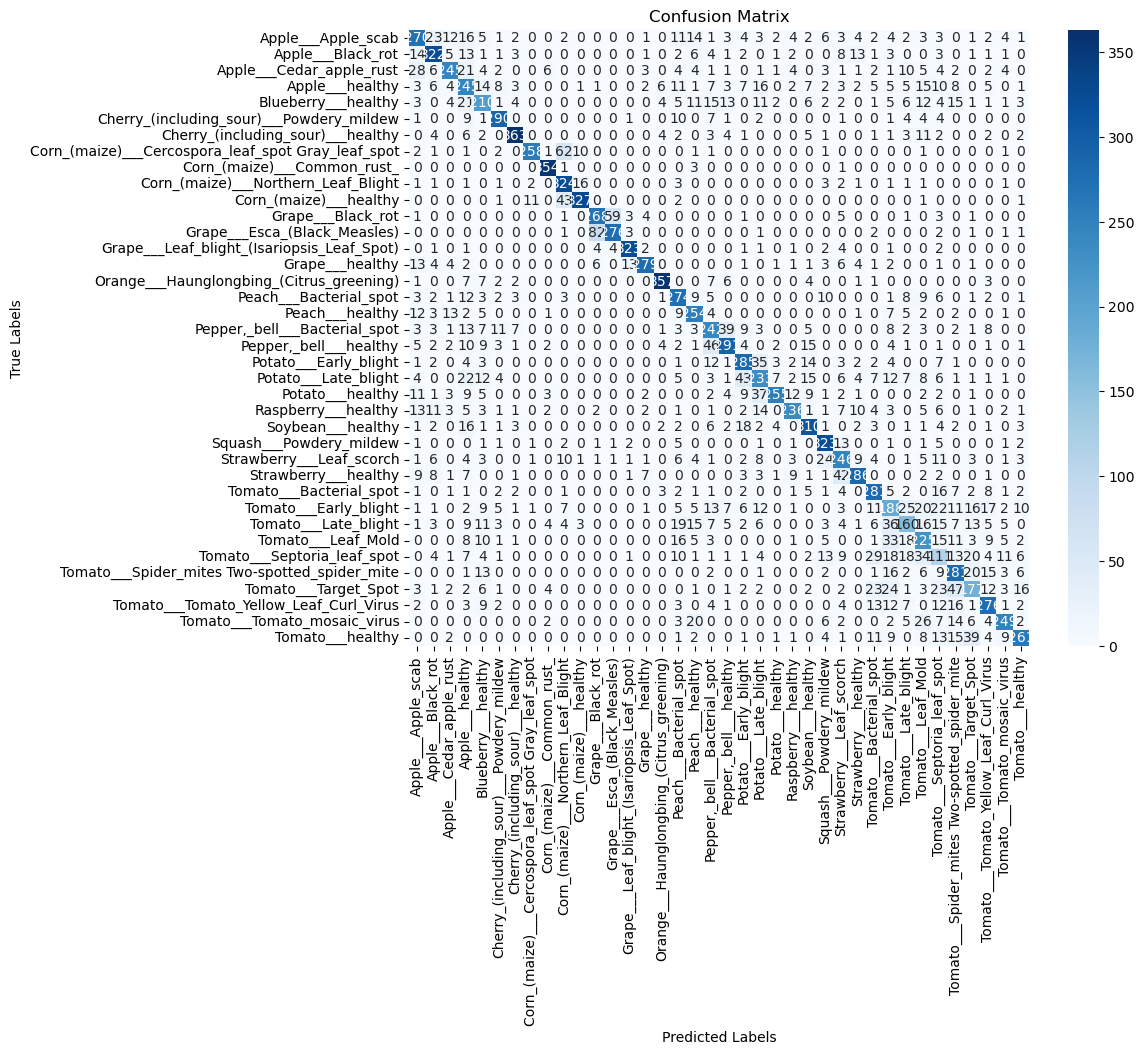

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_val, y_val_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


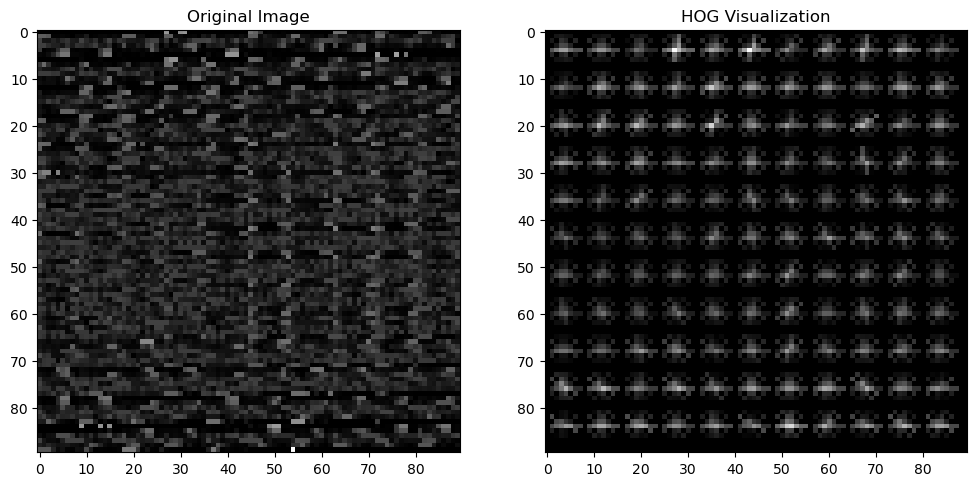

In [ ]:
import cv2
from skimage.feature import hog
import matplotlib.pyplot as plt

sample_img = X_val[0].reshape(90, 90)
hog_features, hog_image = hog(sample_img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

# Plot the original image and its HOG visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(sample_img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Visualization')
plt.show()


#VGG

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import os
from keras.applications.vgg16 import VGG16
import keras
from numpy import load
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from keras import backend
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import SGD
from keras.models import Model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.layers import Dropout
from keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
batch_size = 128

In [ ]:
train_dataset_generator=ImageDataGenerator(rescale=1./255,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.20)

tesr_dataset_generator=ImageDataGenerator(rescale=1./255)


In [ ]:
train_images=train_dataset_generator.flow_from_directory(
                                        train_images_dir,
                                        batch_size=128,
                                        target_size=(224,224),
                                        class_mode='categorical',
                                        subset='training',
                                        color_mode='rgb'
                                        )

Found 56251 images belonging to 38 classes.


In [ ]:
validation_images=train_dataset_generator.flow_from_directory(
                                        train_images_dir,
                                        batch_size=128,
                                        target_size=(224,224),
                                        class_mode='categorical',
                                        subset='validation',
                                        color_mode='rgb'

                                        )

Found 14044 images belonging to 38 classes.


In [ ]:
test_images=tesr_dataset_generator.flow_from_directory(
                                        test_images_dir,
                                        batch_size=128,
                                        target_size=(224,224),
                                        class_mode='categorical',
                                        color_mode='rgb'
                                        )

Found 17572 images belonging to 38 classes.


In [ ]:
class_dict = train_images.class_indices
print(class_dict)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

In [ ]:
li = list(class_dict.keys())
print(li)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [ ]:
train_num = train_images.samples
valid_num = validation_images.samples

In [ ]:
base_model=VGG16(include_top=False,input_shape=(224,224,3))
base_model.trainable=False

In [ ]:
classifier=keras.models.Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(38,activation='softmax'))
classifier.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 38)             │       953,382 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,668,070 (59.77 MB)

 Trainable params: 953,382 (3.64 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
classifier.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = classifier.fit(train_images,
                         steps_per_epoch=train_num//batch_size,
                         validation_data=validation_images,
                         epochs=5,
                         validation_steps=valid_num//batch_size,
                         )
#saving model
#filepath="Mymodel.hdf5"
#model.save(filepath)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 4184s 10s/step - accuracy: 0.7350 - loss: 1.0049 - val_accuracy: 0.8917 - val_loss: 0.3321
Epoch 2/5
  1/439 ━━━━━━━━━━━━━━━━━━━━ 47:05 6s/step - accuracy: 0.8594 - loss: 0.3896

/opt/anaconda3/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


439/439 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8594 - loss: 0.3896 - val_accuracy: 0.9348 - val_loss: 0.2802
Epoch 3/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 3951s 9s/step - accuracy: 0.9244 - loss: 0.2343 - val_accuracy: 0.9019 - val_loss: 0.3101
Epoch 4/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9062 - loss: 0.3343 - val_accuracy: 0.8370 - val_loss: 0.5116
Epoch 5/5
439/439 ━━━━━━━━━━━━━━━━━━━━ 4048s 9s/step - accuracy: 0.9403 - loss: 0.1786 - val_accuracy: 0.9095 - val_loss: 0.2868


In [ ]:
filepath = "/Users/Desktop/Desktop - Varun’s MacBook Pro/Mymodel.h5"
classifier.save(filepath)


In [ ]:
import tensorflow as tf
classifier.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

In [ ]:
model_train_accuracy1 = max(history.history['accuracy'])
model_val_accuracy1 = max(history.history['val_accuracy'])

print("VGG Model Training Accuracy:", model_train_accuracy1)
print("VGG Model Validation Accuracy:", model_val_accuracy1)

VGG Model Training Accuracy: 0.9386348128318787
VGG Model Validation Accuracy: 0.9347826242446899


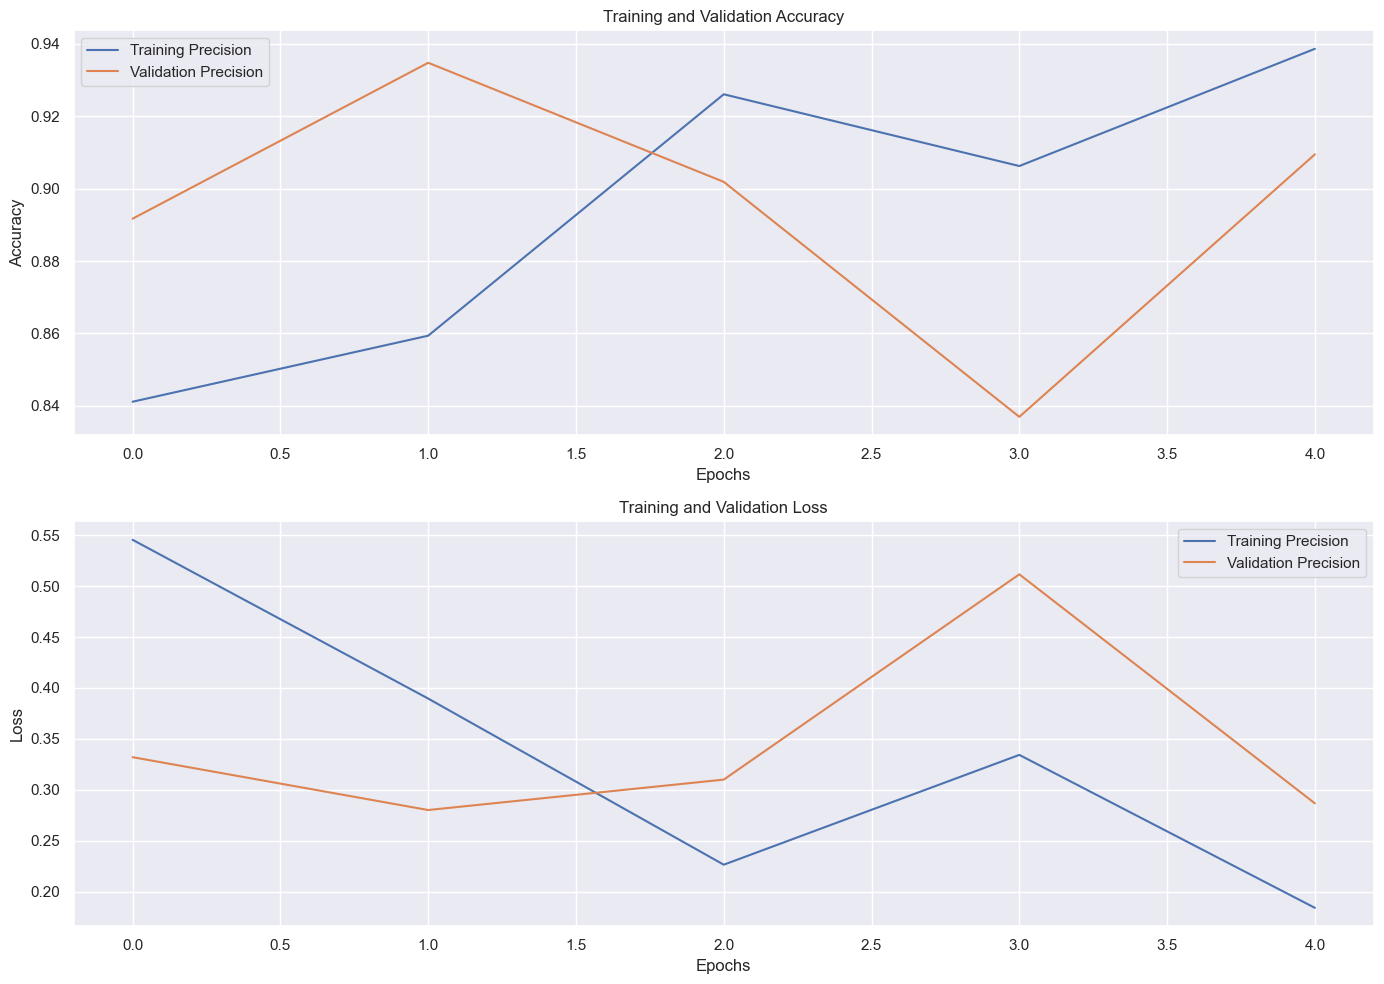

In [ ]:
metrics1 = {
    "Accuracy": ("accuracy", "val_accuracy"),
    "Loss": ("loss", "val_loss"),
}

fig, axs = plt.subplots(2, 1, figsize=(14, 10))
axs = axs.ravel()

for i, (model_metric_name1, (model_train_metric1, model_val_metric1)) in enumerate(metrics1.items()):
    axs[i].plot(history.history.get(model_train_metric1), label=f'Training {model_metric_name}')
    axs[i].plot(history.history.get(model_val_metric1), label=f'Validation {model_metric_name}')
    axs[i].set_xlabel('Epochs')
    axs[i].set_ylabel(model_metric_name1)
    axs[i].set_title(f'Training and Validation {model_metric_name1}')
    axs[i].legend()

plt.tight_layout()
plt.show()

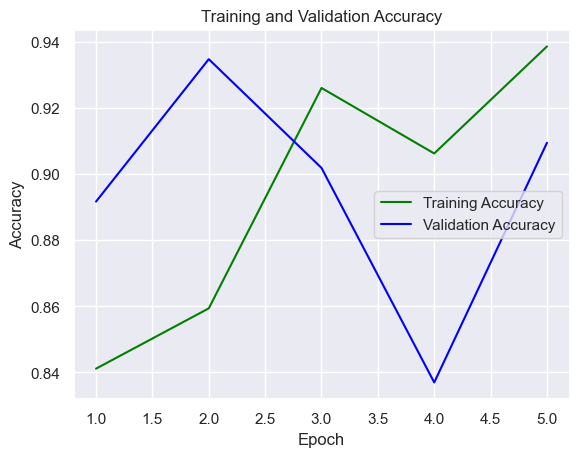

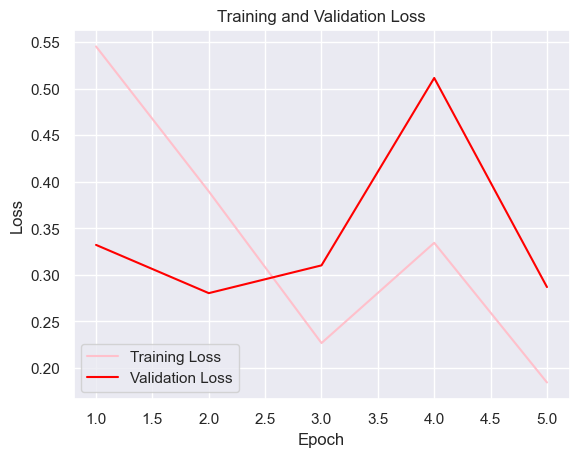

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Following is our prediction:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


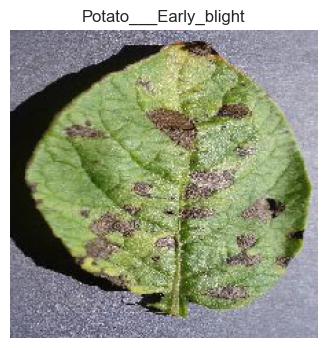

In [ ]:
from keras.preprocessing import image
import numpy as np
image_path = '/Users/Documents/New Plant Diseases Dataset(Augmented)/test/test/PotatoEarlyBlight2.JPG'
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = classifier.predict(img)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()

In [ ]:
import numpy as np

y_pred_probs = classifier.predict(test_images, steps=len(test_images))

y_pred = np.argmax(y_pred_probs, axis=1)

y_true = test_images.classes

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


138/138 ━━━━━━━━━━━━━━━━━━━━ 903s 7s/step


In [ ]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_true, y_pred, average='macro')  # Use 'macro', 'weighted', or 'micro'
recall = recall_score(y_true, y_pred, average='macro')

print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.028184793952513124
Recall: 0.02800436944888525


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=test_images.class_indices.keys()))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.03      0.03      0.03       504
                                 Apple___Black_rot       0.03      0.03      0.03       497
                          Apple___Cedar_apple_rust       0.04      0.04      0.04       440
                                   Apple___healthy       0.03      0.03      0.03       502
                               Blueberry___healthy       0.03      0.03      0.03       454
          Cherry_(including_sour)___Powdery_mildew       0.03      0.03      0.03       421
                 Cherry_(including_sour)___healthy       0.02      0.02      0.02       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.03      0.02      0.02       410
                       Corn_(maize)___Common_rust_       0.03      0.03      0.03       477
               Corn_(maize)___Northern_Leaf_Blight       0.02      0.02      0.